# LARGER DATASETS

In [1]:
#IMPORTING LIBRARIES    
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read insurance data set
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# lets try one hot encoding in our data frame due to the categorical data in our data frame (it has strings,integers,floats)
insurance_one_hot=pd.get_dummies(insurance).astype(int)
insurance_one_hot.head() #The insurance_one_hot.head() command in pandas is used to display the first few rows of the insurance_one_hot DataFrame. By default, head() shows the first 5 rows, but you can specify a different number of rows by passing an argument to the method (e.g., head(10) would show the first 10 rows).

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [4]:
#create X and y values (features and labels)
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]
X.head(),y.head()

(   age  bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19   27         0           1         0          0           1   
 1   18   33         1           0         1          1           0   
 2   28   33         3           0         1          1           0   
 3   33   22         0           0         1          1           0   
 4   32   28         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884
 1     1725
 2     4449
 3    21984
 4     3866
 Name: charges, dtype: int32)

In [5]:
#create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [20]:
#build a neural network
tf.random.set_seed(42)

#create model
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
insurance_model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])

#fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13248.0166 - mae: 13248.0166
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13038.6270 - mae: 13038.6270
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12519.9443 - mae: 12519.9443
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11536.0586 - mae: 11536.0586
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10199.6953 - mae: 10199.6953 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8876.5527 - mae: 8876.5527
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7892.3213 - mae: 7892.3213
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7482.9868 - mae: 7482.9868
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7397.4912 - mae: 7397.4912
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7364.9341 - mae: 7364.9341
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7341.9946 - mae: 7341.9946
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0

In [21]:
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5418.1084 - mae: 5418.1084  


[5250.576171875, 5250.576171875]

In [22]:
y_train.mean()

13345.596261682243

Increasing the number of layers (2 -> 3).
Increasing the number of units in each layer (except for the output layer).
Changing the optimizer (from SGD to Adam).

In [51]:
#Right now our model is running substantially wrong so we are goonna try to improve our model
#build a neural network
tf.random.set_seed(42)

#create model
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
insurance_model_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])

#fit the model
history=insurance_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12585.7725 - mae: 12585.7725
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7535.7783 - mae: 7535.7783
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7237.6528 - mae: 7237.6528
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7041.1758 - mae: 7041.1758
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6791.9790 - mae: 6791.9790
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6474.2148 - mae: 6474.2148
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6274.7739 - mae: 6274.7739
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6144.1235 - mae: 6144.1235
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6014.6792 - mae: 6014.6792
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5835.7944 - mae: 5835.7944
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5599.0791 - mae: 5599.0791
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [52]:
insurance_model_2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3210.7727 - mae: 3210.7727  


[3157.692138671875, 3157.692138671875]

Much better! Using a larger model and the Adam optimizer results in almost half the error as the previous model.

🔑 Note: For many problems, the Adam optimizer is a great starting choice. See Andrei Karpathy's "Adam is safe" point from A Recipe for Training Neural Networks for more.

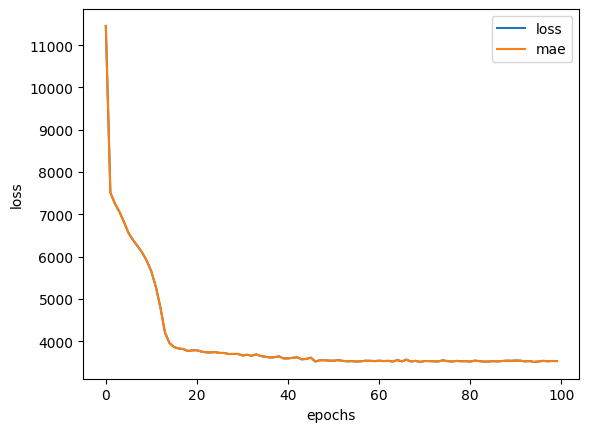

In [53]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [72]:
#build a neural network
tf.random.set_seed(42)

#create model
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
insurance_model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])

#fit the model
history_3=insurance_model_3.fit(X_train,y_train,epochs=200,verbose=0)

In [73]:
insurance_model_3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3213.8464 - mae: 3213.8464  


[3155.63427734375, 3155.63427734375]

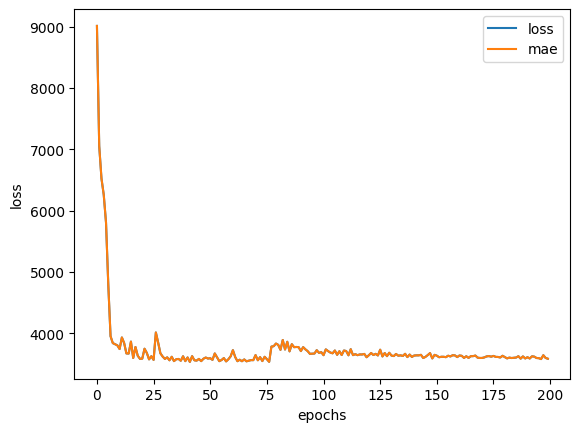

In [65]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [59]:
y_train.mean()

13345.596261682243